In [22]:
drop_num = 0
iter_num = 30
init_sample = 20
batch_size = 2

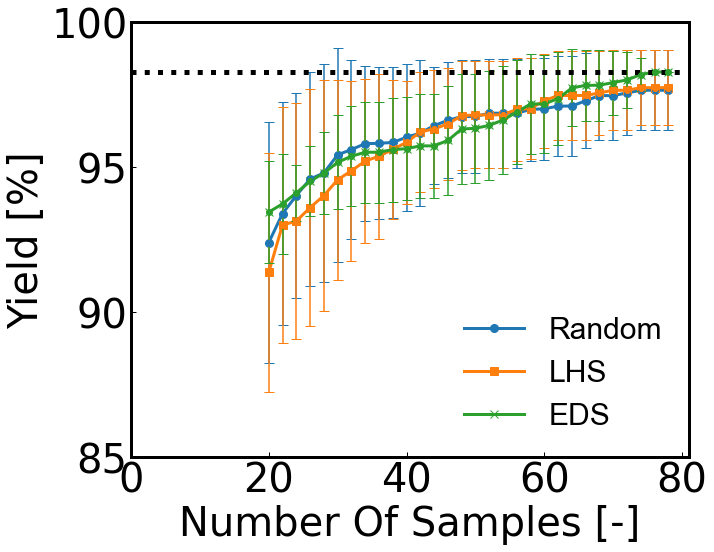

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

import os


# aryl-1优化

# folder_path_1 = r'C:\Users\13282\Desktop\papercode\two_stage\result\Aryl\miny'  #   Goldstein\predict   Alloy\s2_data
# datasets_1 = [  'LHS10_EI60' , 'LHS3_SE7_EI60' ,   ] #   'RDM',  'LHS',  'SE' ,  
#                                             #     'SE10_EI80' ,  'LHS5_SE15_EI60', 
# folder_path_2 = r'C:\Users\13282\Desktop\papercode\trasfer\result\Aryl'  
# datasets_2 = ['aryl-2','aryl-5','aryl-11', ]   #   'aryl-2','aryl-11',



# folder_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Aryl\all_data\miny'  
# folder_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Aryl\aryl1\original_data\miny'  
# folder_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Aryl\aryl9\miny'  
folder_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Aryl\aryl15\miny'  
#   Goldstein\predict   Alloy\s2_data  virtual_data  




eval_types = ['miny'] #  regret  Spearman  Edis  miny
# datasets = [ 'RDM20_EI80',   'LHS20_EI80',  'SE20_EI80' , ]
# datasets = [ 'SE20_EI80',   'LHS20_EI80',  'RDM20_EI80' , ]
datasets = [ 'RDM20_EI60',   'LHS20_EI60',  'SE20_EI60_cor' ,]


# color_sets =  [ 'red',  'orange',  'blue' ,]

# label_sets =   datasets
label_sets =    [ 'Random',  'LHS',  'EDS' , ] 

fig = plt.figure(figsize=(10, 8))


fontsize = 40

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for eval_type in eval_types:
    mean_datasets = []
    std_datasets  = []
    # 循环导入每个数据集
    for dataset in datasets:
        # 从 Excel 文件中读取数据
        file_path = os.path.join(folder_path, f'{dataset}_{eval_type}.xlsx')
        
        df = pd.read_excel(file_path, header=0, usecols=range(iter_num))
        
        df = -df  #转化为原始尺度
        

        last_column = df.columns[-1]
        max_indices = df[last_column].nlargest(drop_num).index
        min_indices = df[last_column].nsmallest(drop_num).index
        df = df.drop(max_indices)
        df.reset_index(drop=True, inplace=True)
        df = df.drop(min_indices)
        df.reset_index(drop=True, inplace=True)
        
        

        # 计算均值并存储到列表中
        mean_data = df.mean()
        mean_datasets.append(mean_data) 
        
        std_data = df.std()
        std_datasets.append(std_data)        

    # 绘制每个数据集的均值曲线
    for i, dataset in enumerate(label_sets):
        
        x_values = np.arange(0, len(mean_datasets[i])) * batch_size + init_sample
#         x_values = np.arange(0, 66,5)
        
            
        marker_styles = ['o', 's', 'x', 'v', '^', 'D', 'P']
        line_styles = ['-', '-', '-', '-', '-', '-', '-']
        line, = plt.plot( x_values, mean_datasets[i], label=dataset, marker=marker_styles[i], markersize=8,
                         linestyle=line_styles[i] ,linewidth= 3 ,color=default_colors[  i  % len(default_colors )]) # i  ( 4 - i )

        # 设置每隔五个点标记一次，并标记最后一个点
        markers_num = list(range(0, len(mean_datasets[i]), 1)) 
        plt.errorbar(x_values[markers_num], mean_datasets[i][markers_num], yerr=std_datasets[i][markers_num], 
                     fmt='o', capsize=5,color=line.get_color())


        
        
# 添加标题和坐标轴标签
# plt.title('Evaluation Comparison', fontsize=20)

y_min = np.nanmax(df[last_column])
plt.axhline(y_min, color='black', linestyle=':', linewidth=5,)

plt.xlim(0, iter_num * batch_size + init_sample + 1 )
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(20))

# plt.ylim(30, 48) 
# plt.gca().yaxis.set_major_locator(plt.MultipleLocator(6))

# plt.ylim(78, 87) 
# plt.gca().yaxis.set_major_locator(plt.MultipleLocator(3))

plt.ylim(85, 100) 
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(5))

# 设置x轴刻度标签的字体大小
plt.xticks(fontsize=fontsize)
# 设置y轴刻度标签的字体大小
plt.yticks(fontsize=fontsize)

plt.xlabel('Number Of Samples [-]', fontsize=fontsize)
# plt.xlabel('Iterations [-]', fontsize=fontsize)
plt.ylabel('Yield [%]', fontsize=fontsize)
# plt.ylabel('Virtual Value [-]', fontsize=fontsize*1.2)

# 调整坐标轴参数
plt.tick_params(direction='in', length=5, width=1, labelsize=fontsize , grid_alpha=0.5)

# 显示网格
# plt.grid(True)

legend = plt.legend(loc='best', fontsize=30,frameon=False)
plt.setp(legend.get_texts(), fontname='Arial')

for spine in plt.gca().spines.values():
    spine.set_linewidth(3)  # Set frame width to 3
# 自动调整坐标轴范围
# plt.autoscale()
# plt.tight_layout(rect=[0, 0, 1, 0.95])
# 显示图形
plt.show()

In [13]:
# import seaborn as sns
# from matplotlib.ticker import LogFormatter, FuncFormatter


# eval_num = 29

# fig, axs = plt.subplots(len(datasets), 1, figsize=(7, 8), sharex=True)
# fontsize = 20

# # 获取默认颜色循环
# default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# for i, dataset in enumerate(datasets):
#     # 从 Excel 文件中读取数据
#     file_path = os.path.join(folder_path, f'{dataset}_{eval_type}.xlsx') 
#     df = pd.read_excel(file_path, header=0)
#     df = -df
        
#         # 找到最后一列的列名,删除最大最小行
# #     last_column = df.columns[-1]
# #     max_indices = df[last_column].nlargest(drop_num).index
# #     min_indices = df[last_column].nsmallest(drop_num).index
# #     df = df.drop(max_indices)
# #     df = df.drop(min_indices)
# #     df.reset_index(drop=True, inplace=True)
        
#     data_column = df.iloc[:, eval_num]
    
    
#     # 绘制直方图到对应的子图上
#     hist_plot = sns.histplot(data_column, color=color_sets[i], kde=False,  # i  ( 4 - i )
#                  alpha=0.6, binwidth=0.2, ax=axs[i],label=f'{label_sets[i]}',log_scale=(False, True)) 
#     #   binwidth=0.01, log_scale=(False, True)   bins=30
    
# # 设置x轴的范围和刻度间隔 
# # 设置x轴的范围
# #     axs[i].set_xlim(0, 6)
# #     x_ticks = np.arange(1, 6, 1)  # 设置刻度间隔为10
# #     axs[i].set_xticks(x_ticks)  
# # 设置y轴的范围和刻度间隔
# #     y_max = 40 # 设置y轴的最大值
# #     y_ticks = np.arange(0, y_max + 1, 10)  # 设置刻度间隔为10
# #     axs[i].set_yticks(y_ticks)
    
#     y_ticks = [10**i for i in range(-1, int(np.log10(100)) + 1)]
#     axs[i].set_yticks(y_ticks)
    
#     # 设置y轴标签为科学计数法形式
#     def log_format_func(value, tick_number):
#         return f'$10^{{{int(np.log10(value))}}}$' if value > 0 else '0'
#     axs[i].get_yaxis().set_major_formatter(FuncFormatter(log_format_func)) 
    
#     axs[i].tick_params(direction='in', length=5, width=1, labelsize=fontsize, grid_alpha=0.5)
    
    
# # 调整所有子图的框线宽度
#     for spine in axs[i].spines.values():
#         spine.set_linewidth(3) 
    
#     # 去除子图的 ylabel
#     axs[i].set_ylabel('')
#     legend = axs[i].legend(loc='upper left', fontsize=fontsize,frameon=False)
#     plt.setp(legend.get_texts(), fontname='Arial')
    
    
# # 设置公共的x轴标签

# plt.xlabel('Yield [%]', fontsize=fontsize*1.2)
# # plt.xlabel('Creep Rupture Life [h]', fontsize=fontsize*1.2)
# fig.text(-0.025, 0.5, 'Counts [-]', va='center', rotation='vertical', fontsize=fontsize*1.2)
# # 添加总体标题
# # plt.suptitle(f'The Distribution Histogram of the {eval_num+1}th Iteration', fontsize=fontsize*1.2)

# # 添加网格线
# # plt.grid(True)
# # 调整子图间距
# plt.tight_layout(rect=[0, 0, 1, 0.95])

# # 显示图形
# plt.show()


# 模型评估画图

In [1]:
drop_num = 0
iter_num = 20
init_sample = 3
batch_size = 2

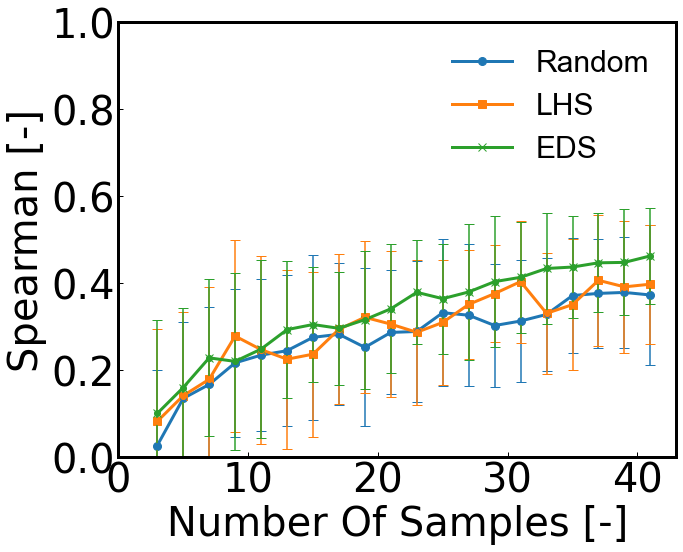

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

import os


# aryl-1优化

# folder_path_1 = r'C:\Users\13282\Desktop\papercode\two_stage\result\Aryl\miny'  #   Goldstein\predict   Alloy\s2_data
# datasets_1 = [  'LHS10_EI60' , 'LHS3_SE7_EI60' ,   ] #   'RDM',  'LHS',  'SE' ,  
#                                             #     'SE10_EI80' ,  'LHS5_SE15_EI60', 
# folder_path_2 = r'C:\Users\13282\Desktop\papercode\trasfer\result\Aryl'  
# datasets_2 = ['aryl-2','aryl-5','aryl-11', ]   #   'aryl-2','aryl-11',



# folder_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Aryl\all_data\predict' 
# folder_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Aryl\aryl1\original_data\old_data\predict'
folder_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Aryl\aryl1\original_data\predict' 
# folder_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Aryl\aryl9\predict' 
# folder_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Aryl\aryl15\predict' 

#   virtual_data\predict    all_data\predict' 



eval_types = ['Spearman'] #  regret  Spearman  Edis  miny
datasets = ['RDM',  'LHS',  'SE' , ]


# label_sets =   datasets
label_sets =    [ 'Random',  'LHS',  'EDS' , ] 

fig = plt.figure(figsize=(10, 8))

fontsize = 40

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for eval_type in eval_types:
    mean_datasets = []
    std_datasets  = []
    # 循环导入每个数据集
    for dataset in datasets:
        # 从 Excel 文件中读取数据
        file_path = os.path.join(folder_path, f'{dataset}_{eval_type}.xlsx')
        
        df = pd.read_excel(file_path, header=0, usecols=range(iter_num))
        

        # 计算均值并存储到列表中
        mean_data = df.mean()
        mean_datasets.append(mean_data) 
        
        std_data = df.std()
        std_datasets.append(std_data)        

    # 绘制每个数据集的均值曲线
    for i, dataset in enumerate(label_sets):
        
        x_values = np.arange(0, len(mean_datasets[i])) * batch_size + init_sample
#         x_values = np.arange(0, 66,5)
        
        # 设置每隔五个点标记一次，并标记最后一个点
        markers_num = list(range(0, len(mean_datasets[i]), 1)) 
        
        marker_styles = ['o', 's', 'x', 'v', '^', 'D', 'P']
        line_styles = ['-', '-', '-', '-', '-', '-', '-']
#         line, = plt.plot( x_values, mean_datasets[i], label=dataset, marker=marker_styles[i], markersize=8,
#                          linestyle=line_styles[i] ,linewidth= 3 ,color=default_colors[  i  % len(default_colors )])  # i  ( 4 - i ).
        
        line, = plt.plot( x_values[markers_num], mean_datasets[i][markers_num], label=dataset, marker=marker_styles[i], markersize=8,
                 linestyle=line_styles[i] ,linewidth= 3 ,color=default_colors[  i  % len(default_colors )])  # i  ( 4 - i )


        plt.errorbar(x_values[markers_num], mean_datasets[i][markers_num], yerr=std_datasets[i][markers_num], 
                     fmt='o', capsize=5,color=line.get_color())


        
        
# 添加标题和坐标轴标签
# plt.title('Evaluation Comparison', fontsize=20)


plt.xlim(0, iter_num *batch_size  + init_sample )
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(batch_size*5))


plt.ylim(0, 1) # (-1, 4)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.2))

# 设置x轴刻度标签的字体大小
plt.xticks(fontsize=fontsize)
# 设置y轴刻度标签的字体大小
plt.yticks(fontsize=fontsize)

plt.xlabel('Number Of Samples [-]', fontsize=fontsize)
# plt.xlabel('Iterations [-]', fontsize=fontsize)
plt.ylabel('Spearman [-]', fontsize=fontsize)

# 调整坐标轴参数
plt.tick_params(direction='in', length=5, width=1, labelsize=fontsize, grid_alpha=0.5)

# 显示网格
# plt.grid(True)

legend = plt.legend(loc='best', fontsize=30,frameon=False)
plt.setp(legend.get_texts(), fontname='Arial')

for spine in plt.gca().spines.values():
    spine.set_linewidth(3)  # Set frame width to 3
# 自动调整坐标轴范围
# plt.autoscale()
# 显示图形
plt.show()

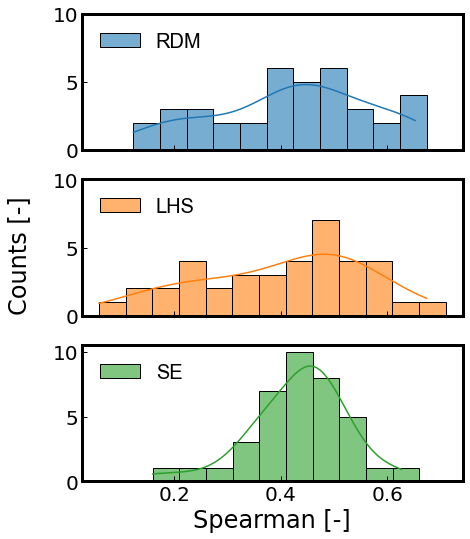

In [77]:
import seaborn as sns


eval_num = 6

fig, axs = plt.subplots(len(datasets), 1, figsize=(6, 8), sharex=True)

fontsize = 20

# 获取默认颜色循环
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, dataset in enumerate(datasets):
    # 从 Excel 文件中读取数据
    file_path = os.path.join(folder_path, f'{dataset}_{eval_type}.xlsx') 
    df = pd.read_excel(file_path, header=0)
    
        # 找到最后一列的列名,删除最大最小行
    last_column = df.columns[-1]
    max_indices = df[last_column].nlargest(drop_num).index
    min_indices = df[last_column].nsmallest(drop_num).index
    df = df.drop(max_indices)
    df = df.drop(min_indices)
    df.reset_index(drop=True, inplace=True)
        
    data_column = df.iloc[:, eval_num]
    
    # 绘制直方图到对应的子图上
    hist_plot = sns.histplot(data_column, color=default_colors[ i  % len(default_colors)], kde=True,  # i  ( 4 - i )
                 alpha=0.6, binwidth=0.05, ax=axs[i],label=f'{label_sets[i]}', ) #   binwidth=0.01, log_scale=(False, True) 
    
# 设置x轴的范围和刻度间隔 
# 设置x轴的范围
#     axs[i].set_xlim(0.45, 1.05)
#     x_ticks = np.arange(0.5,1.05, 0.1)  # 设置刻度间隔为10
#     axs[i].set_xticks(x_ticks)  
# 设置y轴的范围和刻度间隔
    y_max = 10 # 设置y轴的最大值
    y_ticks = np.arange(0, y_max + 1, 5)  # 设置刻度间隔为10
    axs[i].set_yticks(y_ticks)
    axs[i].tick_params(direction='in', length=5, width=1, labelsize=fontsize, grid_alpha=0.5)
    
    
    
    
# 调整所有子图的框线宽度
    for spine in axs[i].spines.values():
        spine.set_linewidth(3) 
    
    # 去除子图的 ylabel
    axs[i].set_ylabel('')
    legend = axs[i].legend(loc='upper left', fontsize=fontsize,frameon=False)
    plt.setp(legend.get_texts(), fontname='Arial')
    
# 设置公共的x轴标签
plt.xlabel('Spearman [-]', fontsize=fontsize*1.2)  # Regret  Spearman
fig.text(-0.08, 0.5, 'Counts [-]', va='center', rotation='vertical', fontsize=fontsize*1.2)
# 添加总体标题
# plt.suptitle(f'The Distribution Histogram of the {eval_num+1}th Iteration', fontsize=fontsize)



# 添加网格线
# plt.grid(True)
# 调整子图间距
plt.tight_layout(rect=[0, 0, 1, 0.95])

# 显示图形
plt.show()


# 分别导入数据画图

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

In [48]:
base_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Goldstein\predict'

# df0 = pd.read_csv(base_path + 'EI+EI_regret.csv')
df0 = pd.read_excel(base_path + '/SE(LHS3)/SE_spearman.xlsx')
df1 = pd.read_excel(base_path + '/SE(RDM1)/SE_spearman.xlsx')
df2 = pd.read_excel(base_path + '/SE(min1)/SE_spearman.xlsx')
# df3 = pd.read_excel(base_path + 'SE+EI-20_regret.xlsx')
# df4 = pd.read_excel(base_path + 'SE+EI-30_regret.xlsx')

# 删除各自的第一列数据
df1 = df1.drop(df1.columns[0], axis=1)
df2 = df2.drop(df2.columns[0], axis=1)

df1.columns = range(df1.shape[1])
df2.columns = range(df2.shape[1])

mean_datasets = []

mean_data0 = df0.mean()
mean_data1 = df1.mean()
mean_data2 = df2.mean()
# mean_data3 = df3.mean()
# mean_data4 = df4.mean()


std_datasets  = []
std_data0 = df0.std()
std_data1 = df1.std()
std_data2 = df2.std()
# std_data3 = df3.std()
# std_data4 = df4.std()

mean_datasets = [mean_data0, mean_data1, mean_data2, ]
std_datasets = [std_data0, std_data1, std_data2, ]

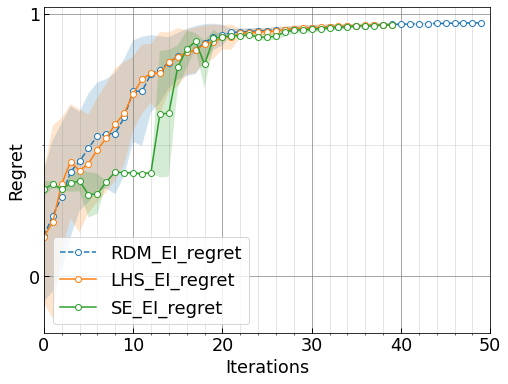

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# 定义评估类型列表
eval_types = ['regret']

# 'EI+EI', 'RDM+RDM', 'traEI_all+traEI_all','SV+EI', 'SV+traEI_all', 'EI+traEI_all'
# 定义数据集名称列表
# datasets = ['EI+EI', 'RDM+RDM', 'traEI_all+traEI_all','SV+EI-5', 'SV+traEI_all-5', 'EI+traEI_all-2']
datasets = ['RDM_EI_regret','LHS_EI_regret','SE_EI_regret', ]

# 定义标记样式列表
# marker_styles = ['o', 's', 'x', 'v', '^', 'D', 'P']
marker_styles = ['o', 'o', 'o', 'o', 'o', 'o', 'o']

# 定义线型样式列表
line_styles = ['--', '-', '-', '-', '-', '-', '-']

# 创建单个子图布局
fig, axs = plt.subplots(1, 1, figsize=(8, 6))

fs = 22

# 循环导入每个数据集
for idx, dataset in enumerate(datasets):

    mean_data = mean_datasets[idx]  
#     axs.plot(mean_data.index, mean_data.values, label=dataset, marker=marker_styles[idx % len(marker_styles)], markevery=2,
#              linestyle=line_styles[idx % len(line_styles)])
    axs.plot(mean_data.index, mean_data.values, label=dataset, 
         marker=marker_styles[idx % len(marker_styles)], 
         markeredgewidth=1, markerfacecolor='white',  # 这里设置了空心圆圈
         linestyle=line_styles[idx % len(line_styles)],
         markevery=1)  # 每隔两个数据点进行标记
    
    std_data = std_datasets[idx]
    axs.fill_between(mean_data.index, mean_data.values - std_data.values, mean_data.values + std_data.values, alpha=0.2)
    
# axs.set_ylim(bottom=-1)
# axs.set_ylim(top=8)
axs.set_xlim(left=0)
axs.set_xlim(right=50)
axs.set_xlabel('Iterations', fontsize=fs*.8)
axs.set_ylabel('Regret', fontsize=fs*.8)
axs.xaxis.set_major_locator(plt.MultipleLocator(5))

axs.xaxis.set_major_locator(ticker.MultipleLocator(10))  # 设置主刻度标签的位置,每隔10个单位
axs.xaxis.set_minor_locator(ticker.MultipleLocator(2))   # 设置副刻度标签的位置,每隔5个单位
axs.yaxis.set_major_locator(ticker.MultipleLocator(1))  # 设置主刻度标签的位置,每隔10个单位
axs.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))   # 设置副刻度标签的位置,每隔5个单位

axs.grid(True, which='major', linestyle='-', linewidth=1, color='gray', alpha=1)
axs.grid(True, which='minor', linestyle='-', linewidth=1, color='gray', alpha=0.2)

axs.tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.7)

# plt.legend(fontsize=18, loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=len(datasets))
plt.legend(fontsize=18)


# 显示图形
plt.show()

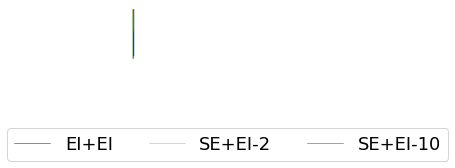

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 定义数据集名称列表
# datasets = ['EI+EI', 'SE+EI-2', 'SE+EI-5', 'SE+EI-10', 'SE+EI-20']

datasets = ['EI+EI', 'SE+EI-2','SE+EI-10', 'SE+EI-20', 'SE+EI-30']
# 定义颜色列表
colors = ['blue', 'orange', 'green', 'red', 'purple']

# 创建单个子图布局
fig, ax = plt.subplots(figsize=(6, 1))

# 在右轴画出正态分布
for mean_data, std_data, dataset, color in zip(mean_datasets, std_datasets, datasets, colors):
    mean_last_point = mean_data.iloc[-1]
    std_last_point = std_data.iloc[-1]
    
    x = np.linspace(mean_last_point - 1 * std_last_point, mean_last_point + 1 * std_last_point, 100)
    ax.plot(x, norm.pdf(x, mean_last_point, std_last_point/3), label=dataset, color=color, linewidth=0.5)
    
    # 添加颜色填充并设置透明度
    ax.fill_between(x, norm.pdf(x, mean_last_point, std_last_point/3), alpha=0.2, color=color)

ax.set_xlim(left=-1)
ax.set_xlim(right=8)

# 隐藏y轴
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)

ax.invert_yaxis()

# 隐藏图表边框
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# 设置x轴位置在底部
ax.xaxis.set_ticks_position('bottom')

# 设置x轴标签
ax.set_xlabel('Value', fontsize=14)

# 隐藏网格线
ax.grid(False)

plt.legend(fontsize=18, loc='lower center', bbox_to_anchor=(0.5, -2), ncol=len(datasets))

plt.show()


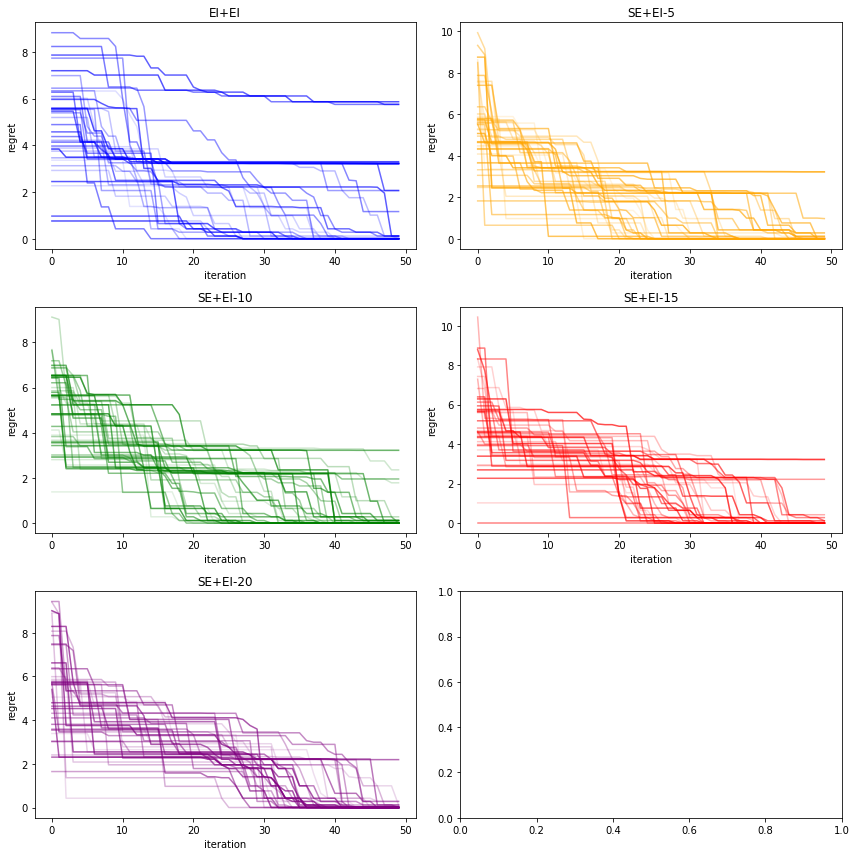

In [6]:
# 定义透明度参数
alpha_increment = 0.6 / len(df0)

# 创建一个包含四个子图的画布
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# 定义线条颜色
colors = ['blue', 'orange', 'green', 'red', 'purple']
# 定义标题
titles = ['EI+EI', 'SE+EI-5','SE+EI-10', 'SE+EI-15', 'SE+EI-20']

# 循环绘制四张子图
for i, (df, title) in enumerate(zip([df0, df1, df2, df3, df4], titles)):
    ax = axs[i // 2, i % 2]  # 获取当前子图的坐标轴
    color = colors[i]  # 获取当前子图的线条颜色

    for j, (index, row) in enumerate(df.iterrows()):
        # 计算当前透明度
        alpha = 0.1 + alpha_increment * (j + 1)
        # 绘制折线图，并设置颜色和透明度
        ax.plot(row.index, row.values, color=color, alpha=alpha)

    ax.set_xlabel('iteration')
    ax.set_ylabel('regret')
    ax.set_title(title)  # 设置子图标题

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()